In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
model = LinearRegression()

df = pd.read_csv('THEDATAFORMODELTRAINING.csv')

df.fillna(0, inplace=True)

X = df[['TotalTaskCount','TasksCompleted','TotalEstimated','TotalCompleted','TotalPriority',
        'TasksDelayedCount','TasksDelayedHours','TasksBeforeDue','TasksBeforeDueHours',
        'TotalEstimatedNACount','TotalCompletedNACount','TotalPriorityNACount','EstimationRating',
        'EstimationRatingFactor1','EstimationRatingFactor2','EfficiencyRatingFactor1',
        'EfficiencyRatingFactor2','PriorityRating','TaskWeightageRating']]

y = df['COG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

transformed_X = scaler.fit_transform(X_train, y_train)

model.fit(transformed_X, y_train)

LinearRegression()

In [7]:
import pickle as pkl

pkl.dump(model, open('linear_model.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))

In [8]:
intercepts = model.intercept_
coeffs = model.coef_

print(f'Intercept: {intercepts}')
print(f'Coefficients: {coeffs}')

Intercept: 2.5044642705245863
Coefficients: [-3.34244517e+07  2.37639254e-01  1.04777258e+00 -1.05406766e+00
  2.48172646e+07 -9.58388867e+05 -3.33871962e+05 -1.00258319e+06
 -1.00258308e+06  6.22244538e-01 -1.32585748e+00  8.61138105e-04
  2.79547401e+06  3.33872442e+05 -7.48275082e+05  9.62473397e+06
 -1.07286444e+07 -2.50913575e+07  3.37504433e+07]


In [4]:
scaled_test = scaler.transform(X_test)

y_pred = model.predict(scaled_test)

y_pred

array([3.40000001, 2.4       , 3.40000001, 2.59999999, 2.19999997,
       2.4       , 2.59999999, 2.39999997, 2.19999997, 2.60000001,
       2.60000002, 2.80000004, 3.40000001, 2.39999999, 2.4       ,
       2.60000002, 3.40000001, 2.40000003, 2.59999999, 2.40000003,
       2.        , 2.39999997, 2.60000001, 2.39999997, 2.39999999,
       2.39999999, 2.4       , 1.99999999, 3.        , 2.        ,
       2.2       , 2.39999999, 2.2       , 2.        , 2.        ,
       2.60000001, 3.40000001, 2.60000001, 2.        , 2.60000002,
       2.19999997, 2.80000004, 3.        , 1.99999999, 3.40000001,
       2.19999997, 2.2       , 2.40000003, 2.80000004, 3.40000001,
       2.19999997, 2.39999997, 2.        , 2.39999999, 2.        ,
       2.19999997, 3.        , 2.59999999, 2.60000001, 2.19999997,
       3.40000001, 2.60000001, 2.59999999, 2.19999997, 2.2       ,
       2.60000002, 2.19999997, 2.40000003, 1.99999999, 3.        ,
       2.        , 3.        , 2.19999997, 2.39999997, 2.19999

In [10]:
variance = y_pred - y_test

variance

285    7.800664e-09
296   -1.155782e-10
117    7.800664e-09
346   -1.157085e-08
70    -3.289813e-08
           ...     
143    1.095141e-09
386    4.356345e-08
320   -5.610381e-09
416   -1.157085e-08
97     2.335375e-08
Name: COG, Length: 224, dtype: float64

In [11]:
model.predict([[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]])

array([2.5654454e+08])

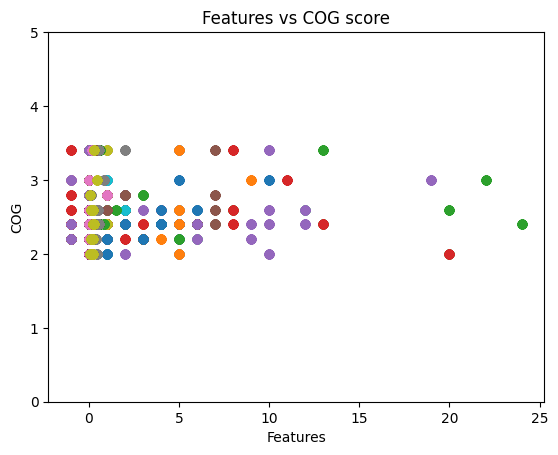

In [47]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'o')
plt.title('Features vs COG score')
plt.xlabel('Features')
plt.ylabel('COG')
plt.ylim(top=5, bottom=0)
plt.show()

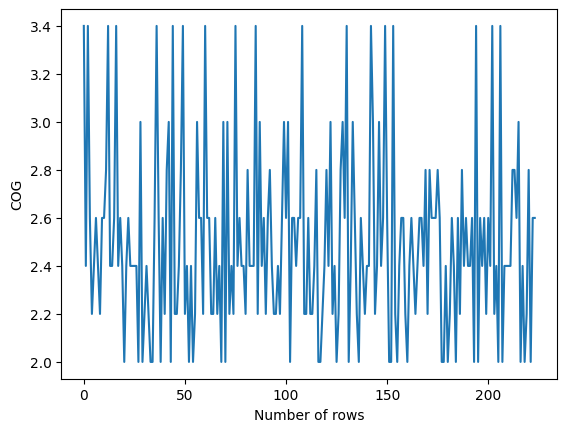

In [45]:
plt.plot(y_pred)
plt.xlabel('Number of rows')
plt.ylabel('COG')
plt.show()

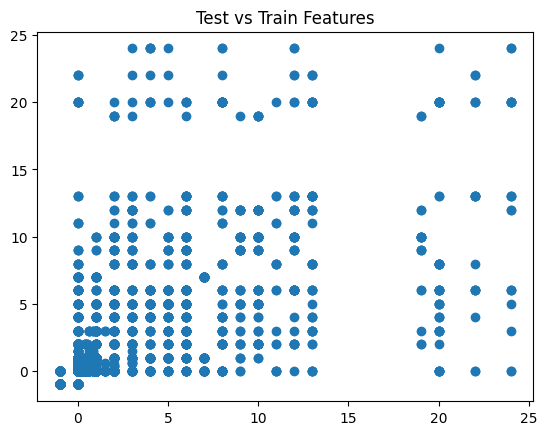

In [43]:
plt.scatter(X_train, X_test)
plt.title('Test vs Train Features')
plt.show()

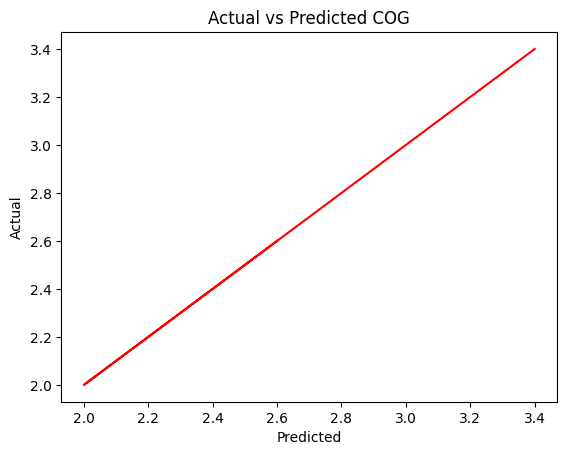

In [46]:
plt.plot(y_pred, y_test, 'r' )
plt.title('Actual vs Predicted COG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [24]:
from sklearn.metrics import r2_score

#r2 score
r2 = r2_score(y_test, y_pred)
print('R2 score: ', r2)

R2 score:  0.9999999999999972


In [8]:
from sklearn import metrics

#mse
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

Mean Squared Error:  3.903010550681727e-16
Root Mean Squared Error:  1.9756038445704965e-08


c:\Users\abuba\Desktop\github\tiramai\iter6dev\tiramai-devops\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\abuba\Desktop\github\tiramai\iter6dev\tiramai-devops\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


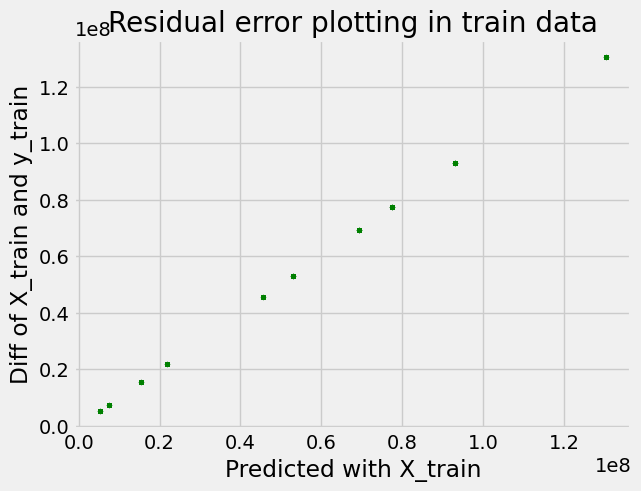

In [23]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.title('Residual error plotting in train data')
plt.xlabel('Predicted with X_train')
plt.ylabel('Diff of X_train and y_train')
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data')

c:\Users\abuba\Desktop\github\tiramai\iter6dev\tiramai-devops\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
c:\Users\abuba\Desktop\github\tiramai\iter6dev\tiramai-devops\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


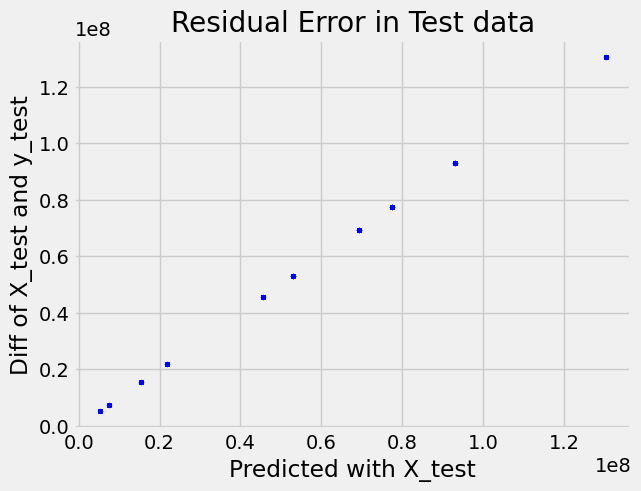

In [22]:
plt.title('Residual Error in Test data')
plt.xlabel('Predicted with X_test')
plt.ylabel('Diff of X_test and y_test')
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data')

(array([15.,  0., 33.,  0., 30., 47., 45., 19.,  0., 35.]),
 array([-4.35634506e-08, -3.59172923e-08, -2.82711339e-08, -2.06249755e-08,
        -1.29788171e-08, -5.33265876e-09,  2.31349961e-09,  9.95965799e-09,
         1.76058164e-08,  2.52519747e-08,  3.28981331e-08]),
 <BarContainer object of 10 artists>)

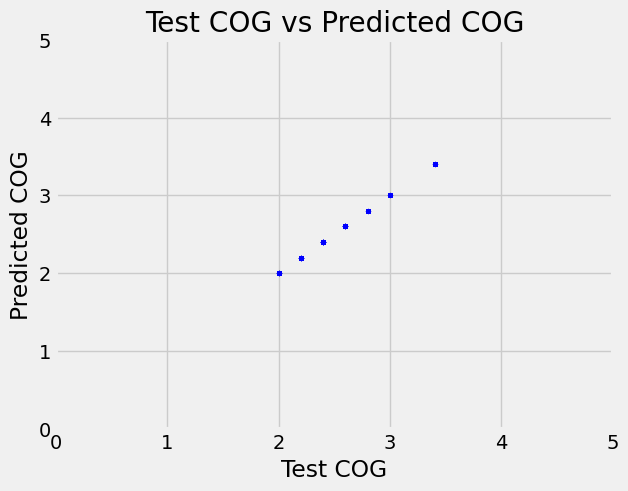

In [21]:
plt.scatter(y_test, y_pred, color = "blue", s = 10, label = 'Test data')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Test COG')
plt.ylabel('Predicted COG')
plt.title('Test COG vs Predicted COG')
plt.hist(y_test - y_pred)